In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.formula.api import ols

pd.options.mode.chained_assignment = None

df = pd.read_csv('../data/raw/properties_preporcessed_1.csv')

In [2]:
df.head() # View the entire data structure

,Unnamed: 0,name,cost_text,rooms,type,cloest station,station_distance,cloest school,school_distance,CBD_distance,...,text,beds,bath,parking,Longitude,Latitude,SA2_CODE21,LOC_PID,LOC_NAME,SA2_MAIN16
0,0,1901/368 St Kilda Road Melbourne VIC 3000,$1800 Per Week,"['3 Beds', '2 Baths', '2 Parking']",Apartment / Unit / Flat,30,1803.65,1374,667.06,1702.19,...,Per Week,3,2,2,144.971027,-37.831809,206051512.0,loc9901d119afda,Melbourne,206051132.0
1,1,1211/200 Spencer Street Melbourne VIC 3000,$480 per week,"['1 Bed', '1 Bath', '1 Parking']",Apartment / Unit / Flat,176,371.68,2265,352.49,2267.13,...,per week,1,1,1,144.953247,-37.816228,206041505.0,loc9901d119afda,Melbourne,206041122.0
2,2,1008/380 Little Lonsdale Street Melbourne VIC ...,$400 pw,"['1 Bed', '1 Bath']",Apartment / Unit / Flat,28,248.50,2189,401.73,1937.39,...,pw,1,1,0,144.958129,-37.812103,206041505.0,loc9901d119afda,Melbourne,206041122.0
3,3,3/27 Flinders Lane Melbourne VIC 3000,$420 per week,"['1 Bed', '1 Bath']",Apartment / Unit / Flat,140,404.26,2193,586.61,790.13,...,per week,1,1,0,144.973365,-37.814732,206041503.0,loc9901d119afda,Melbourne,206041122.0
4,4,611/408 Lonsdale Street Melbourne VIC 3000,$350,"['1 Bed', '1 Bath']",Apartment / Unit / Flat,28,525.08,2265,779.91,1657.95,...,NaN,1,1,0,144.960401,-37.812598,206041504.0,loc9901d119afda,Melbourne,206041122.0


Count the number of properties in each suburb and sort them from largest to smallest.

In [3]:
counts_sub = df[['name']].groupby(df['LOC_NAME']).count().rename({'name':'counts'})  # Count the number of properties according to suburb

In [4]:
counts_sub.sort_values(['name'],ascending=False)

,name
LOC_NAME,
Melbourne,656
South Yarra,249
Southbank,222
Richmond,198
Reservoir,183
...,...
Pyramid Hill,1
Quambatook,1
Queenscliff,1


In [5]:
df['cost_text'] = df['cost_text'].str.extract('(\d+)', expand=False).astype(int) # To calculate the average cost, extract the value of cost

The average cost of each suburb is calculated and sorted from largest to smallest.

In [6]:
avg_cost = df[['name','cost_text']].groupby(df['LOC_NAME']).mean()
avg_cost.sort_values(['cost_text'],ascending=False)

,cost_text
LOC_NAME,
Portsea,16866.666667
Beaumaris,4660.454545
Skenes Creek,3850.000000
Merriang,2800.000000
Flinders,2425.000000
...,...
Natimuk,200.000000
Watchem,200.000000
Nichols Point,195.000000


In [7]:
avg_cost.to_csv('../data/raw/avg_cost.csv')

In [8]:
df_Mel = df[(df.LOC_NAME == 'Melbourne')] # Find properties in Melbourne

Draw a scatter plot to see if there is any relations between each features. I did not find strong relationship in the graph of the total data, and to determine if the relationship of features of each suburb would be different, so I drew a separate graph for the Melbourne data, and found that it behaved basically the same as the total data.

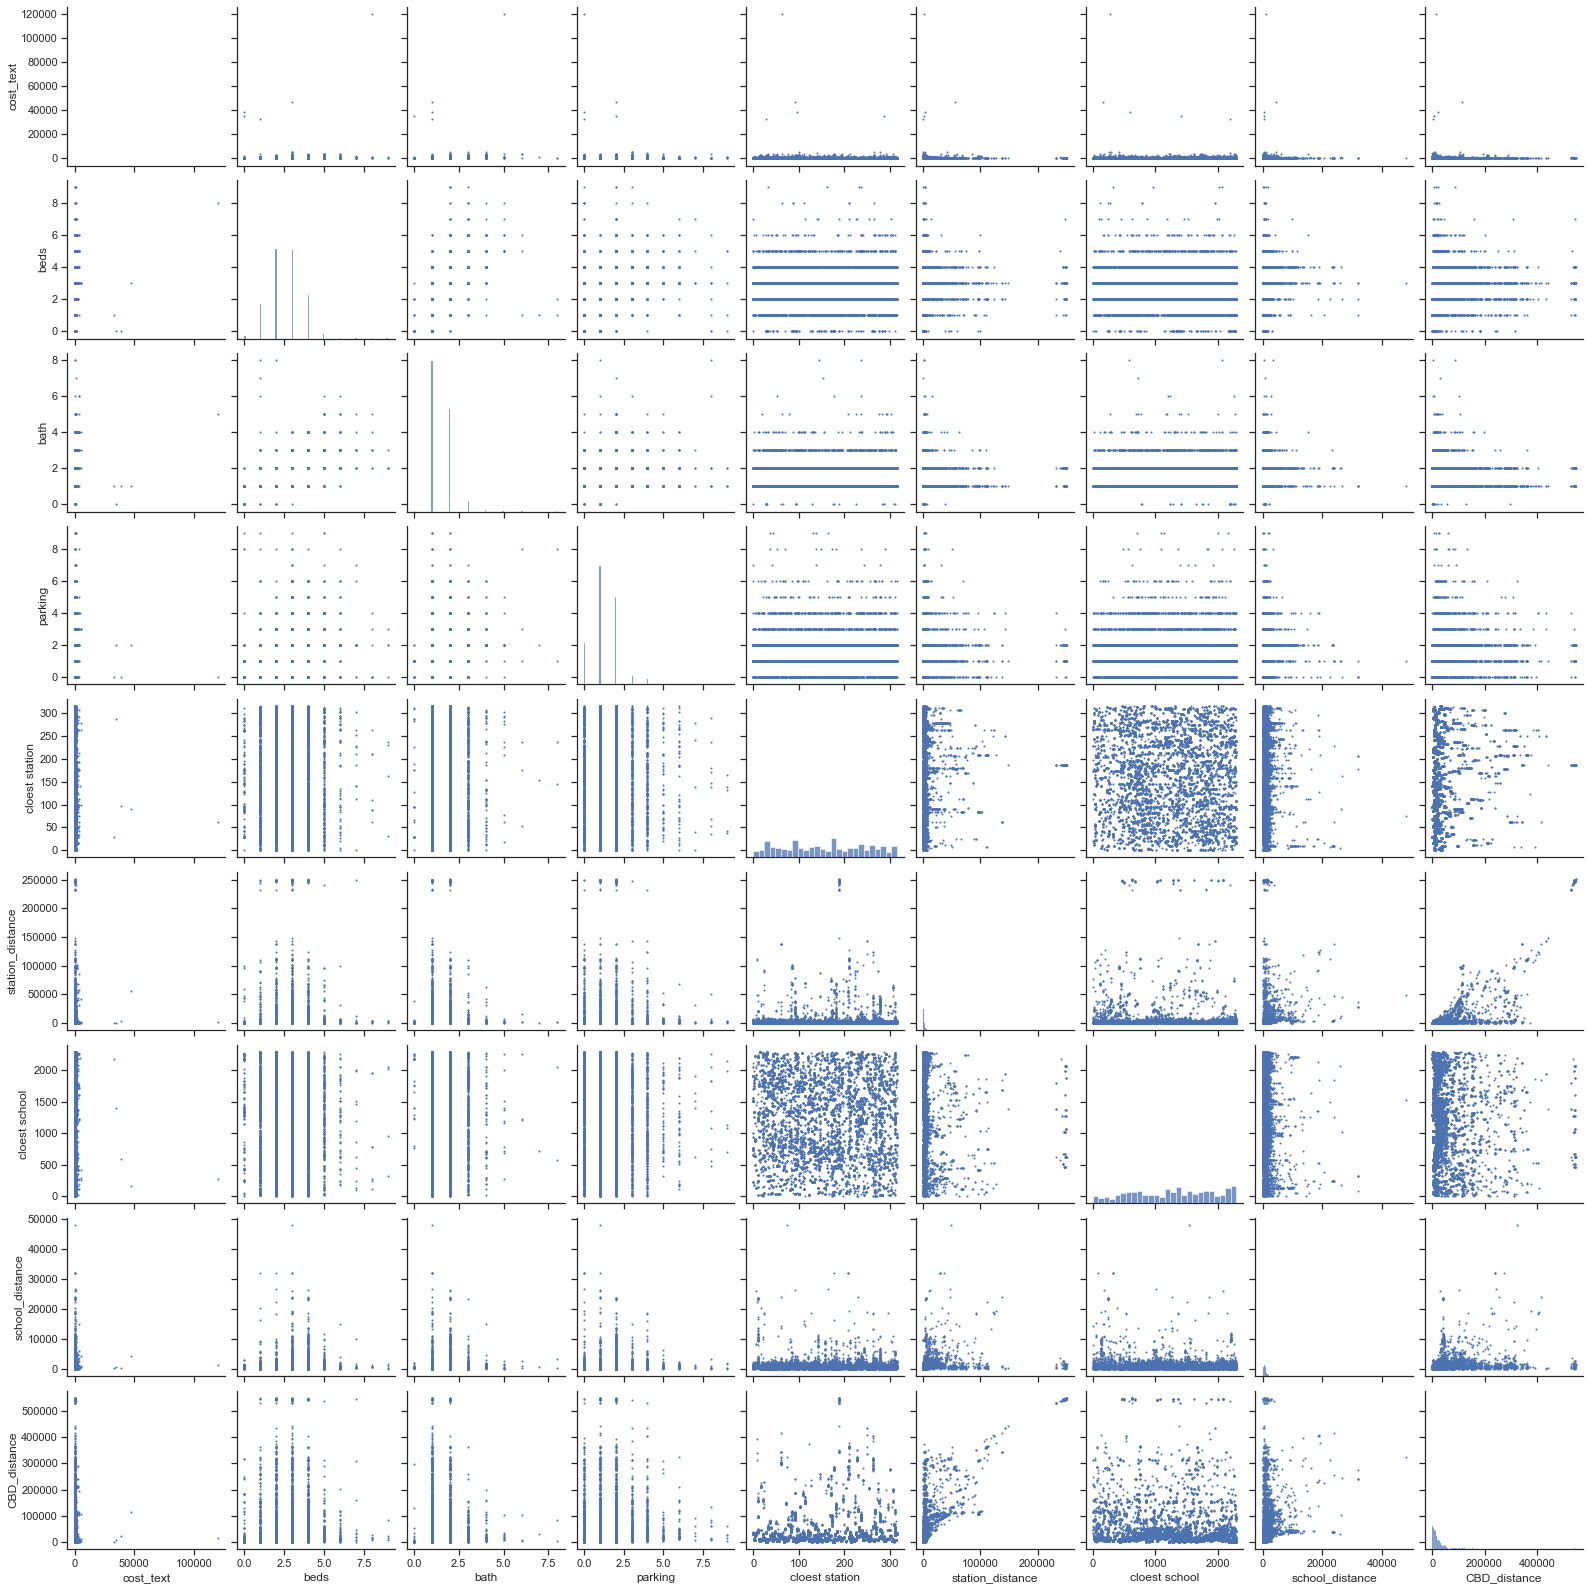

In [9]:
COL_FITTER = ['cost_text','beds','bath','parking','cloest station',	'station_distance',	'cloest school',	'school_distance',	'CBD_distance'] # Select features 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df[COL_FITTER], plot_kws=dict(s=1, edgecolor="b", linewidth=1)) # scatter plot of total data


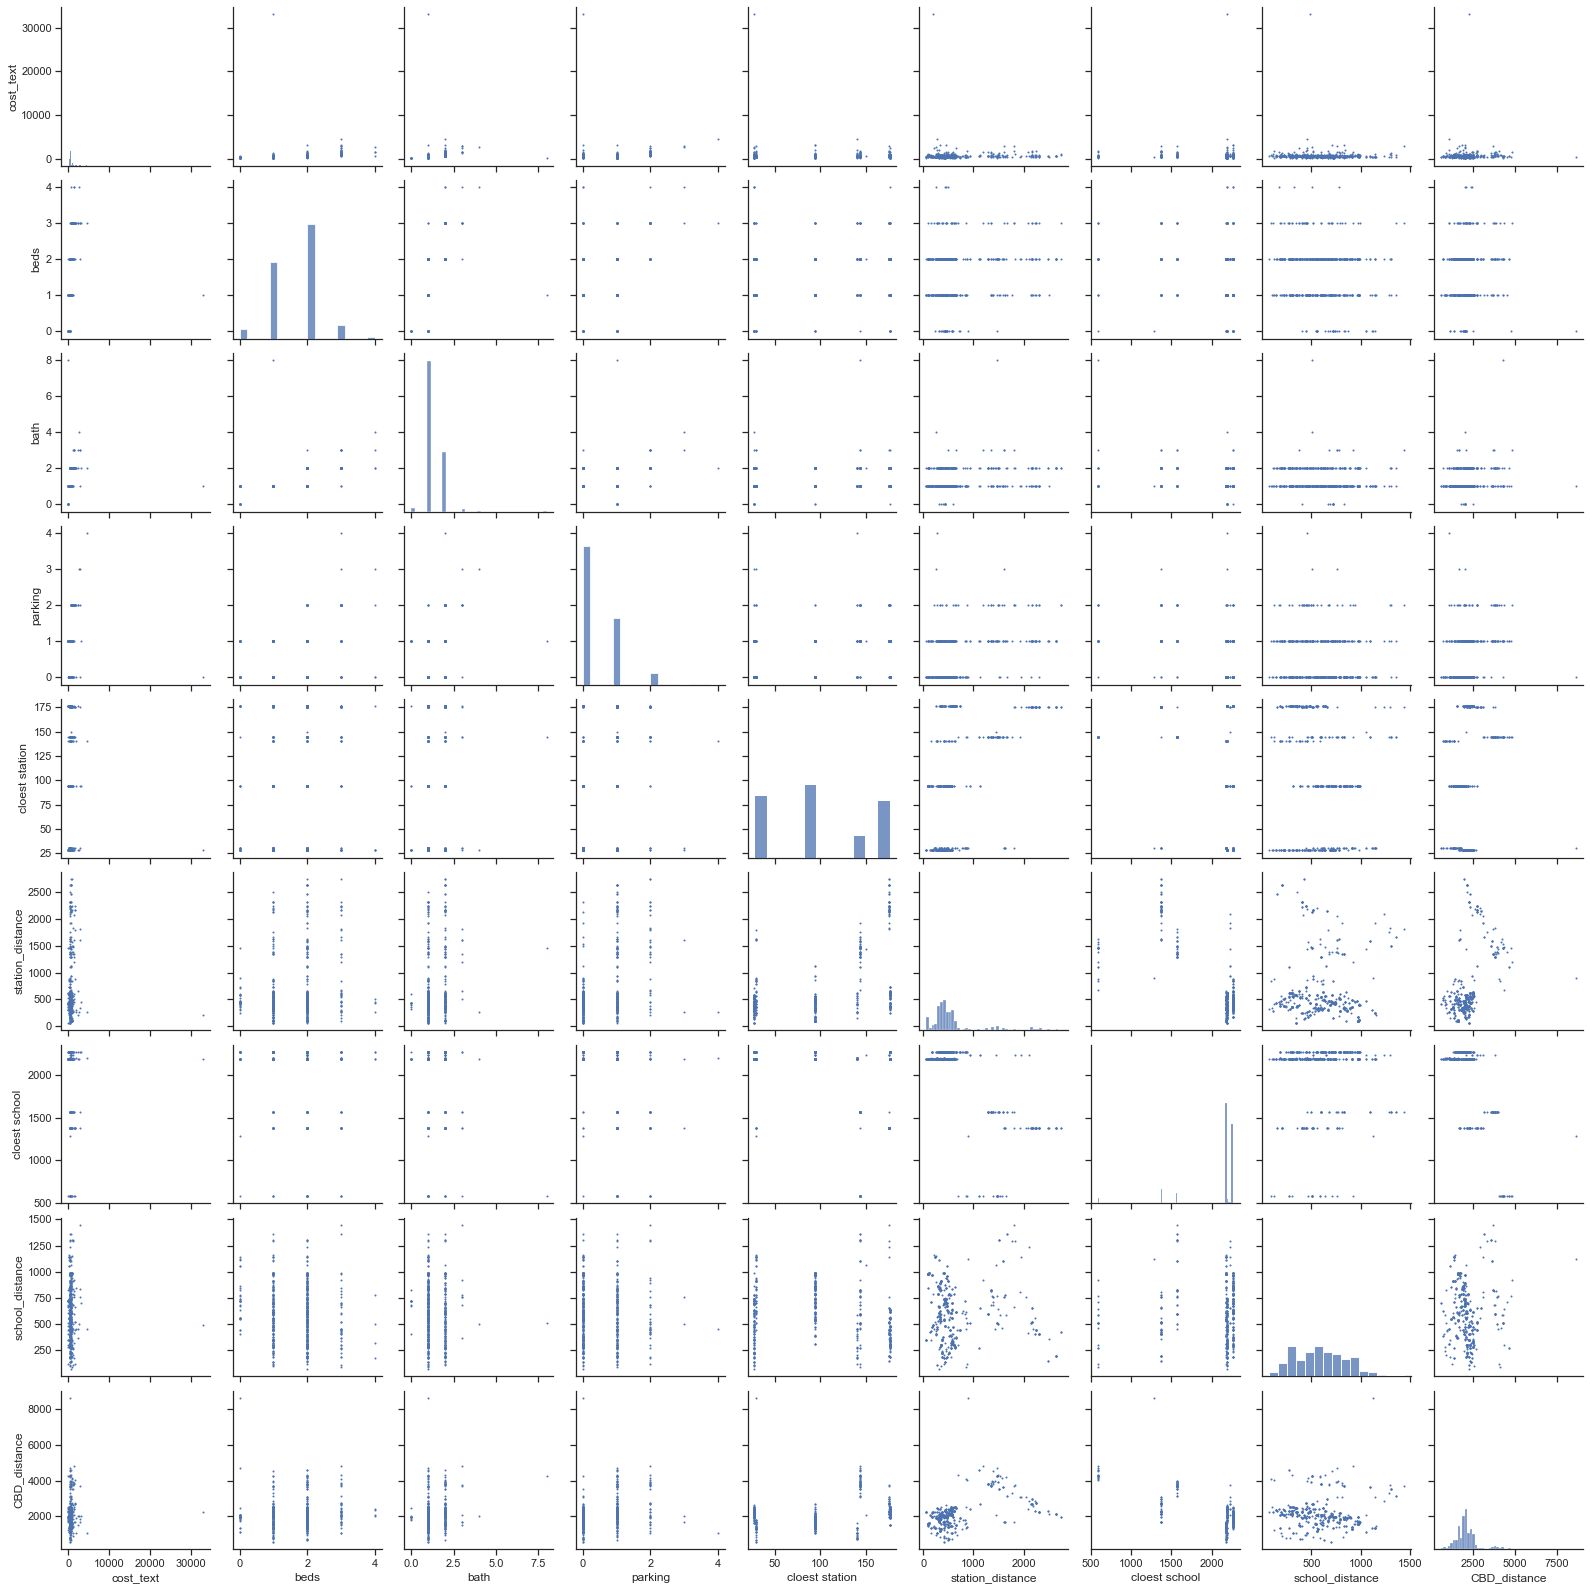

In [10]:
g_mel = sns.pairplot(df_Mel[COL_FITTER], plot_kws=dict(s=1, edgecolor="b", linewidth=1))  # scatter plot of Melbourne data

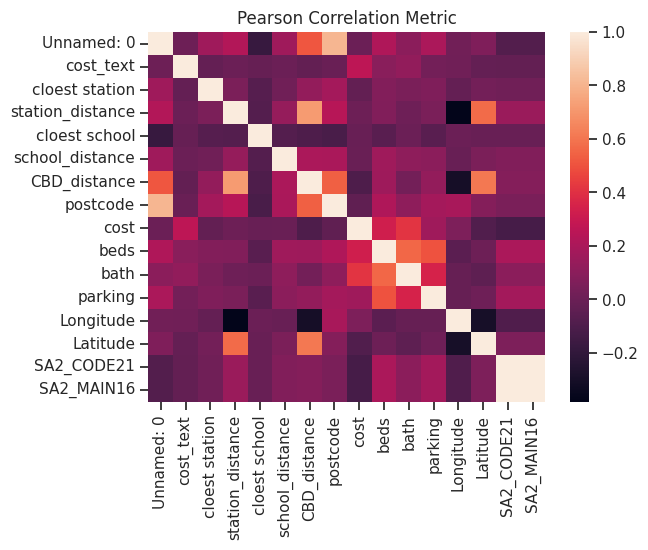

In [ ]:
sns.heatmap(df.corr()) # correlation plot
plt.title('Pearson Correlation Metric')
plt.show()

Considering that house type may have an effect on cost, data on the distribution of the number of house types were counted. 
Since flat and house have the most statistics, scatter plots were drawn for each of these two types to see if there was any difference.

In [ ]:
type_pro = df[['cost_text']].groupby(df['type']).count() # Count the number of different types

In [ ]:
type_pro

,cost_text
type,
Acreage / Semi-Rural,13
Apartment / Unit / Flat,5828
Carspace,6
Duplex,6
House,7062
New Apartments / Off the Plan,5
New House & Land,1
Penthouse,1
Rural,1


In [ ]:
flat_type = df[(df.type == 'Apartment / Unit / Flat'	)] #Find the data whose type is flat

In [ ]:
house_type = df[(df.type == 'House')] #Find the data whose type is house

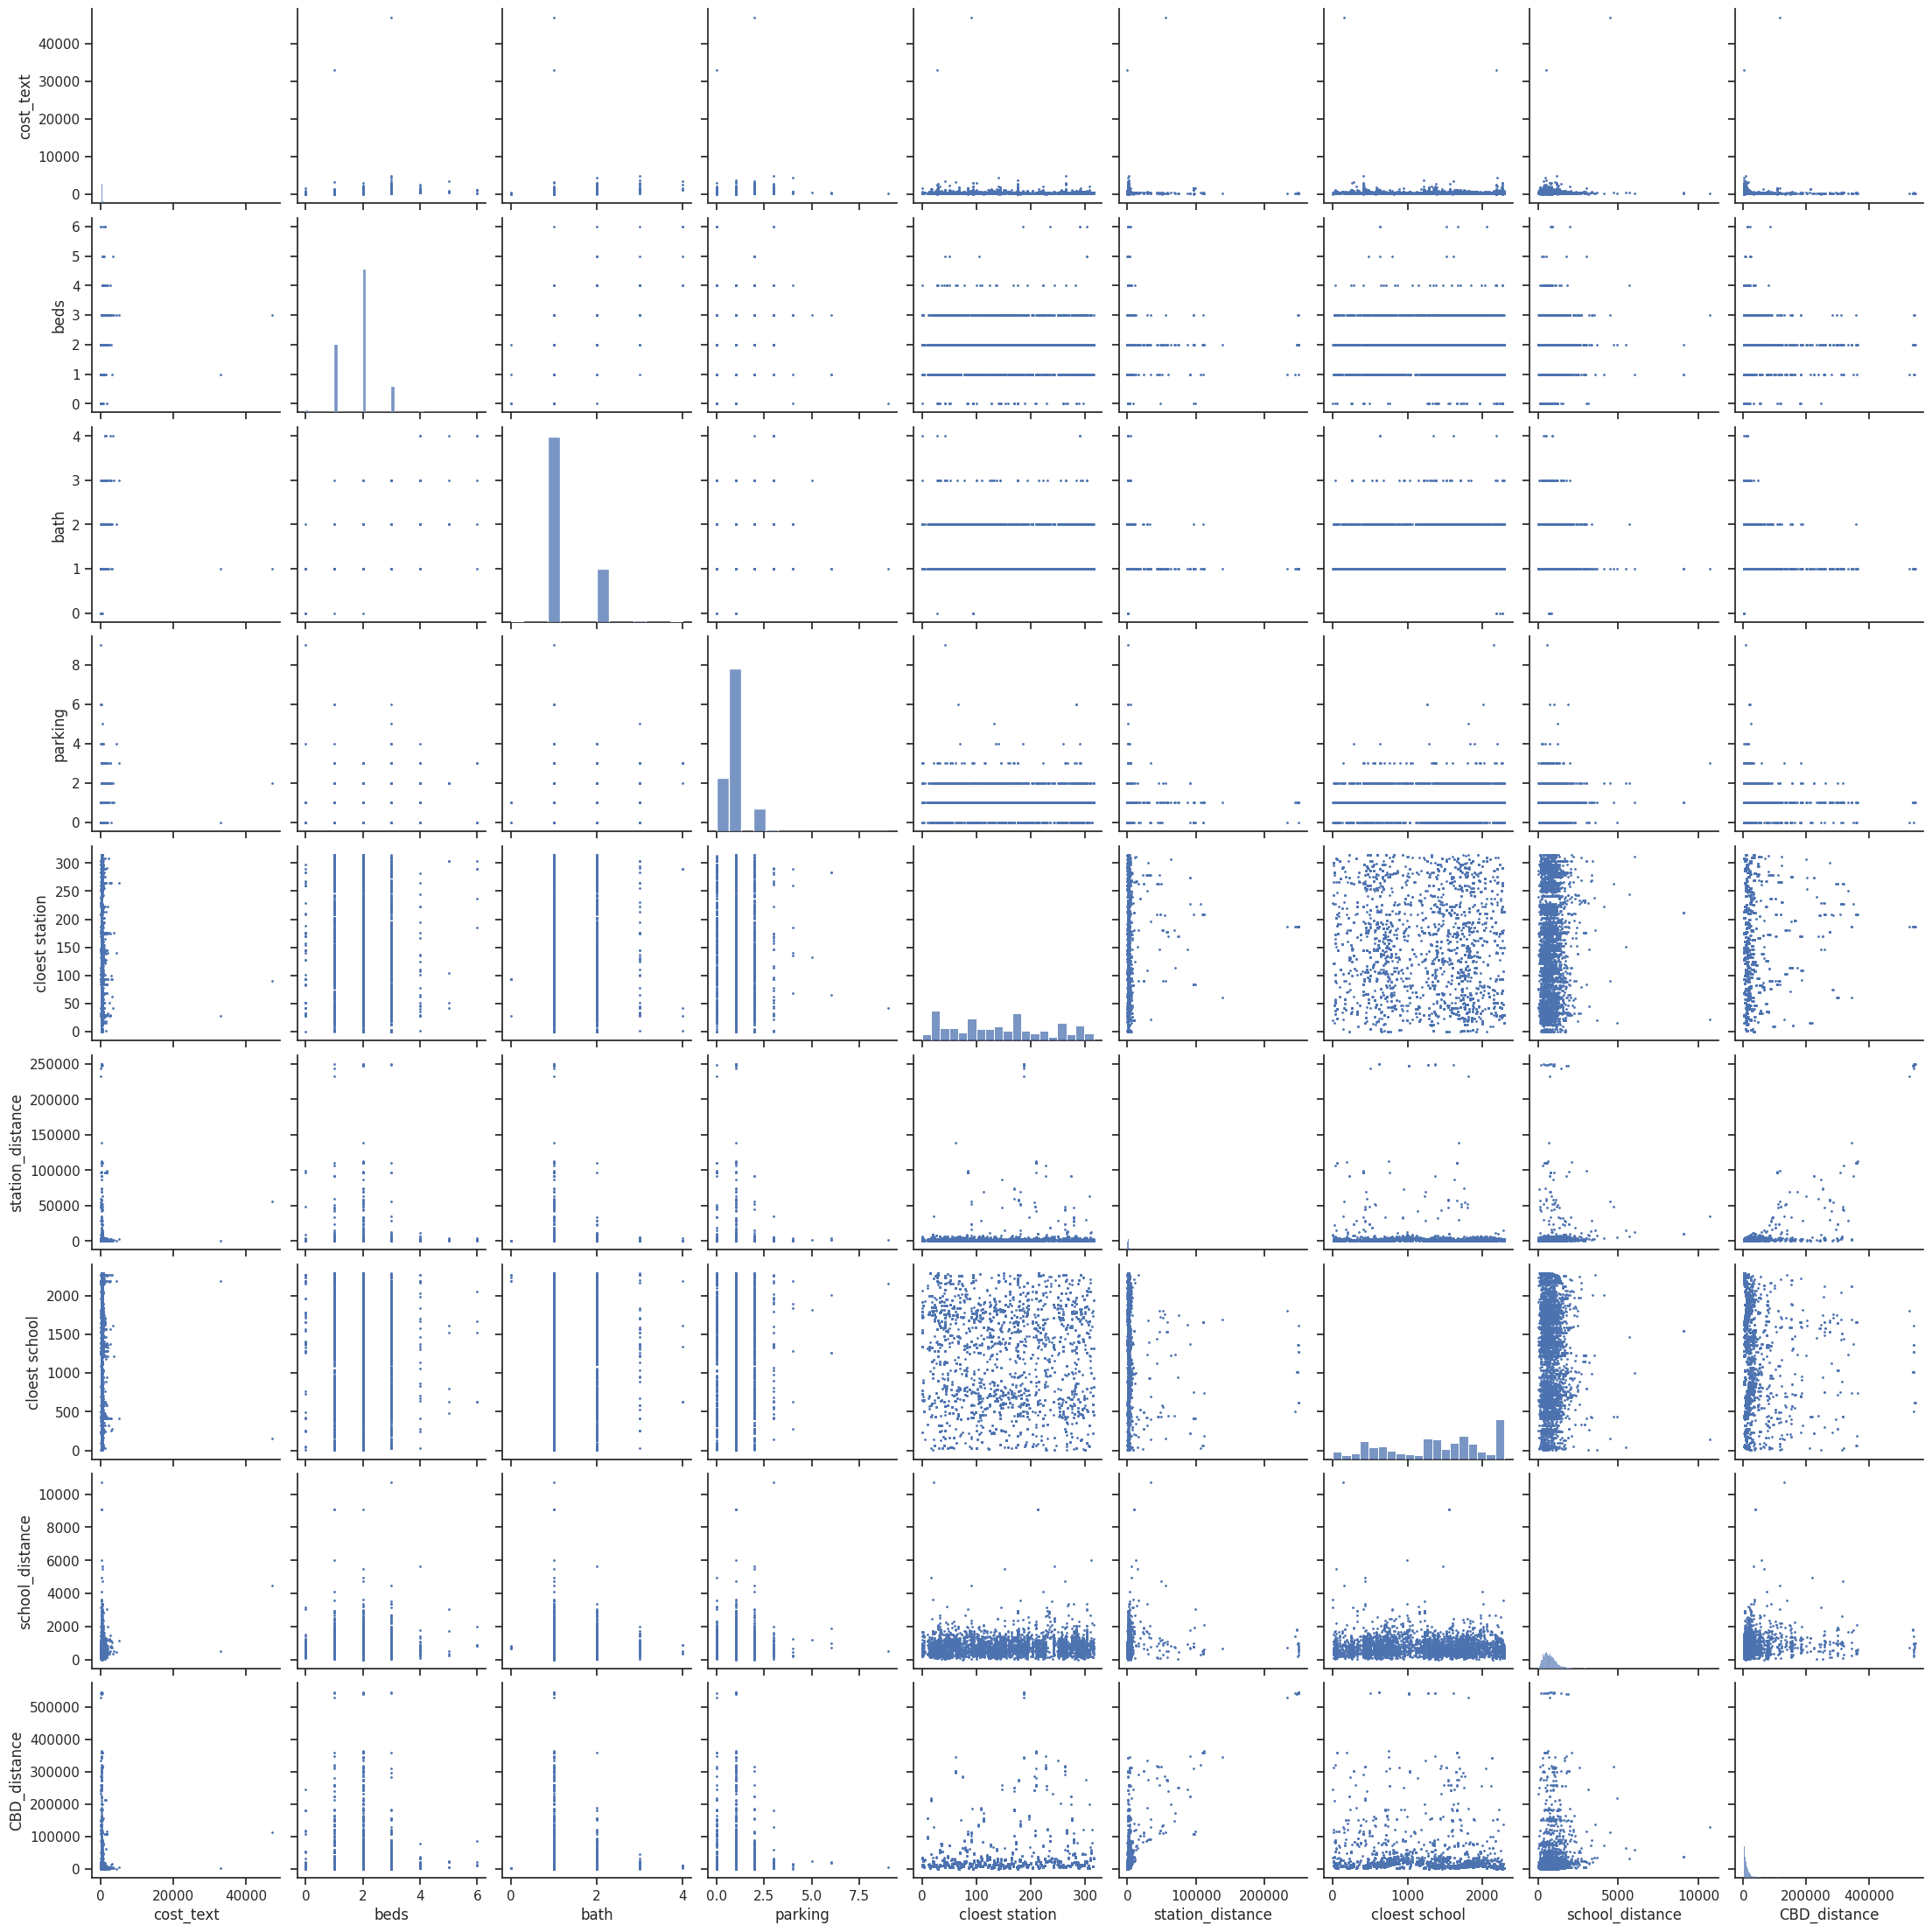

In [ ]:
g1 = sns.pairplot(flat_type[COL_FITTER], plot_kws=dict(s=1, edgecolor="b", linewidth=1)) # Scatter plot of properties when type is Apartment

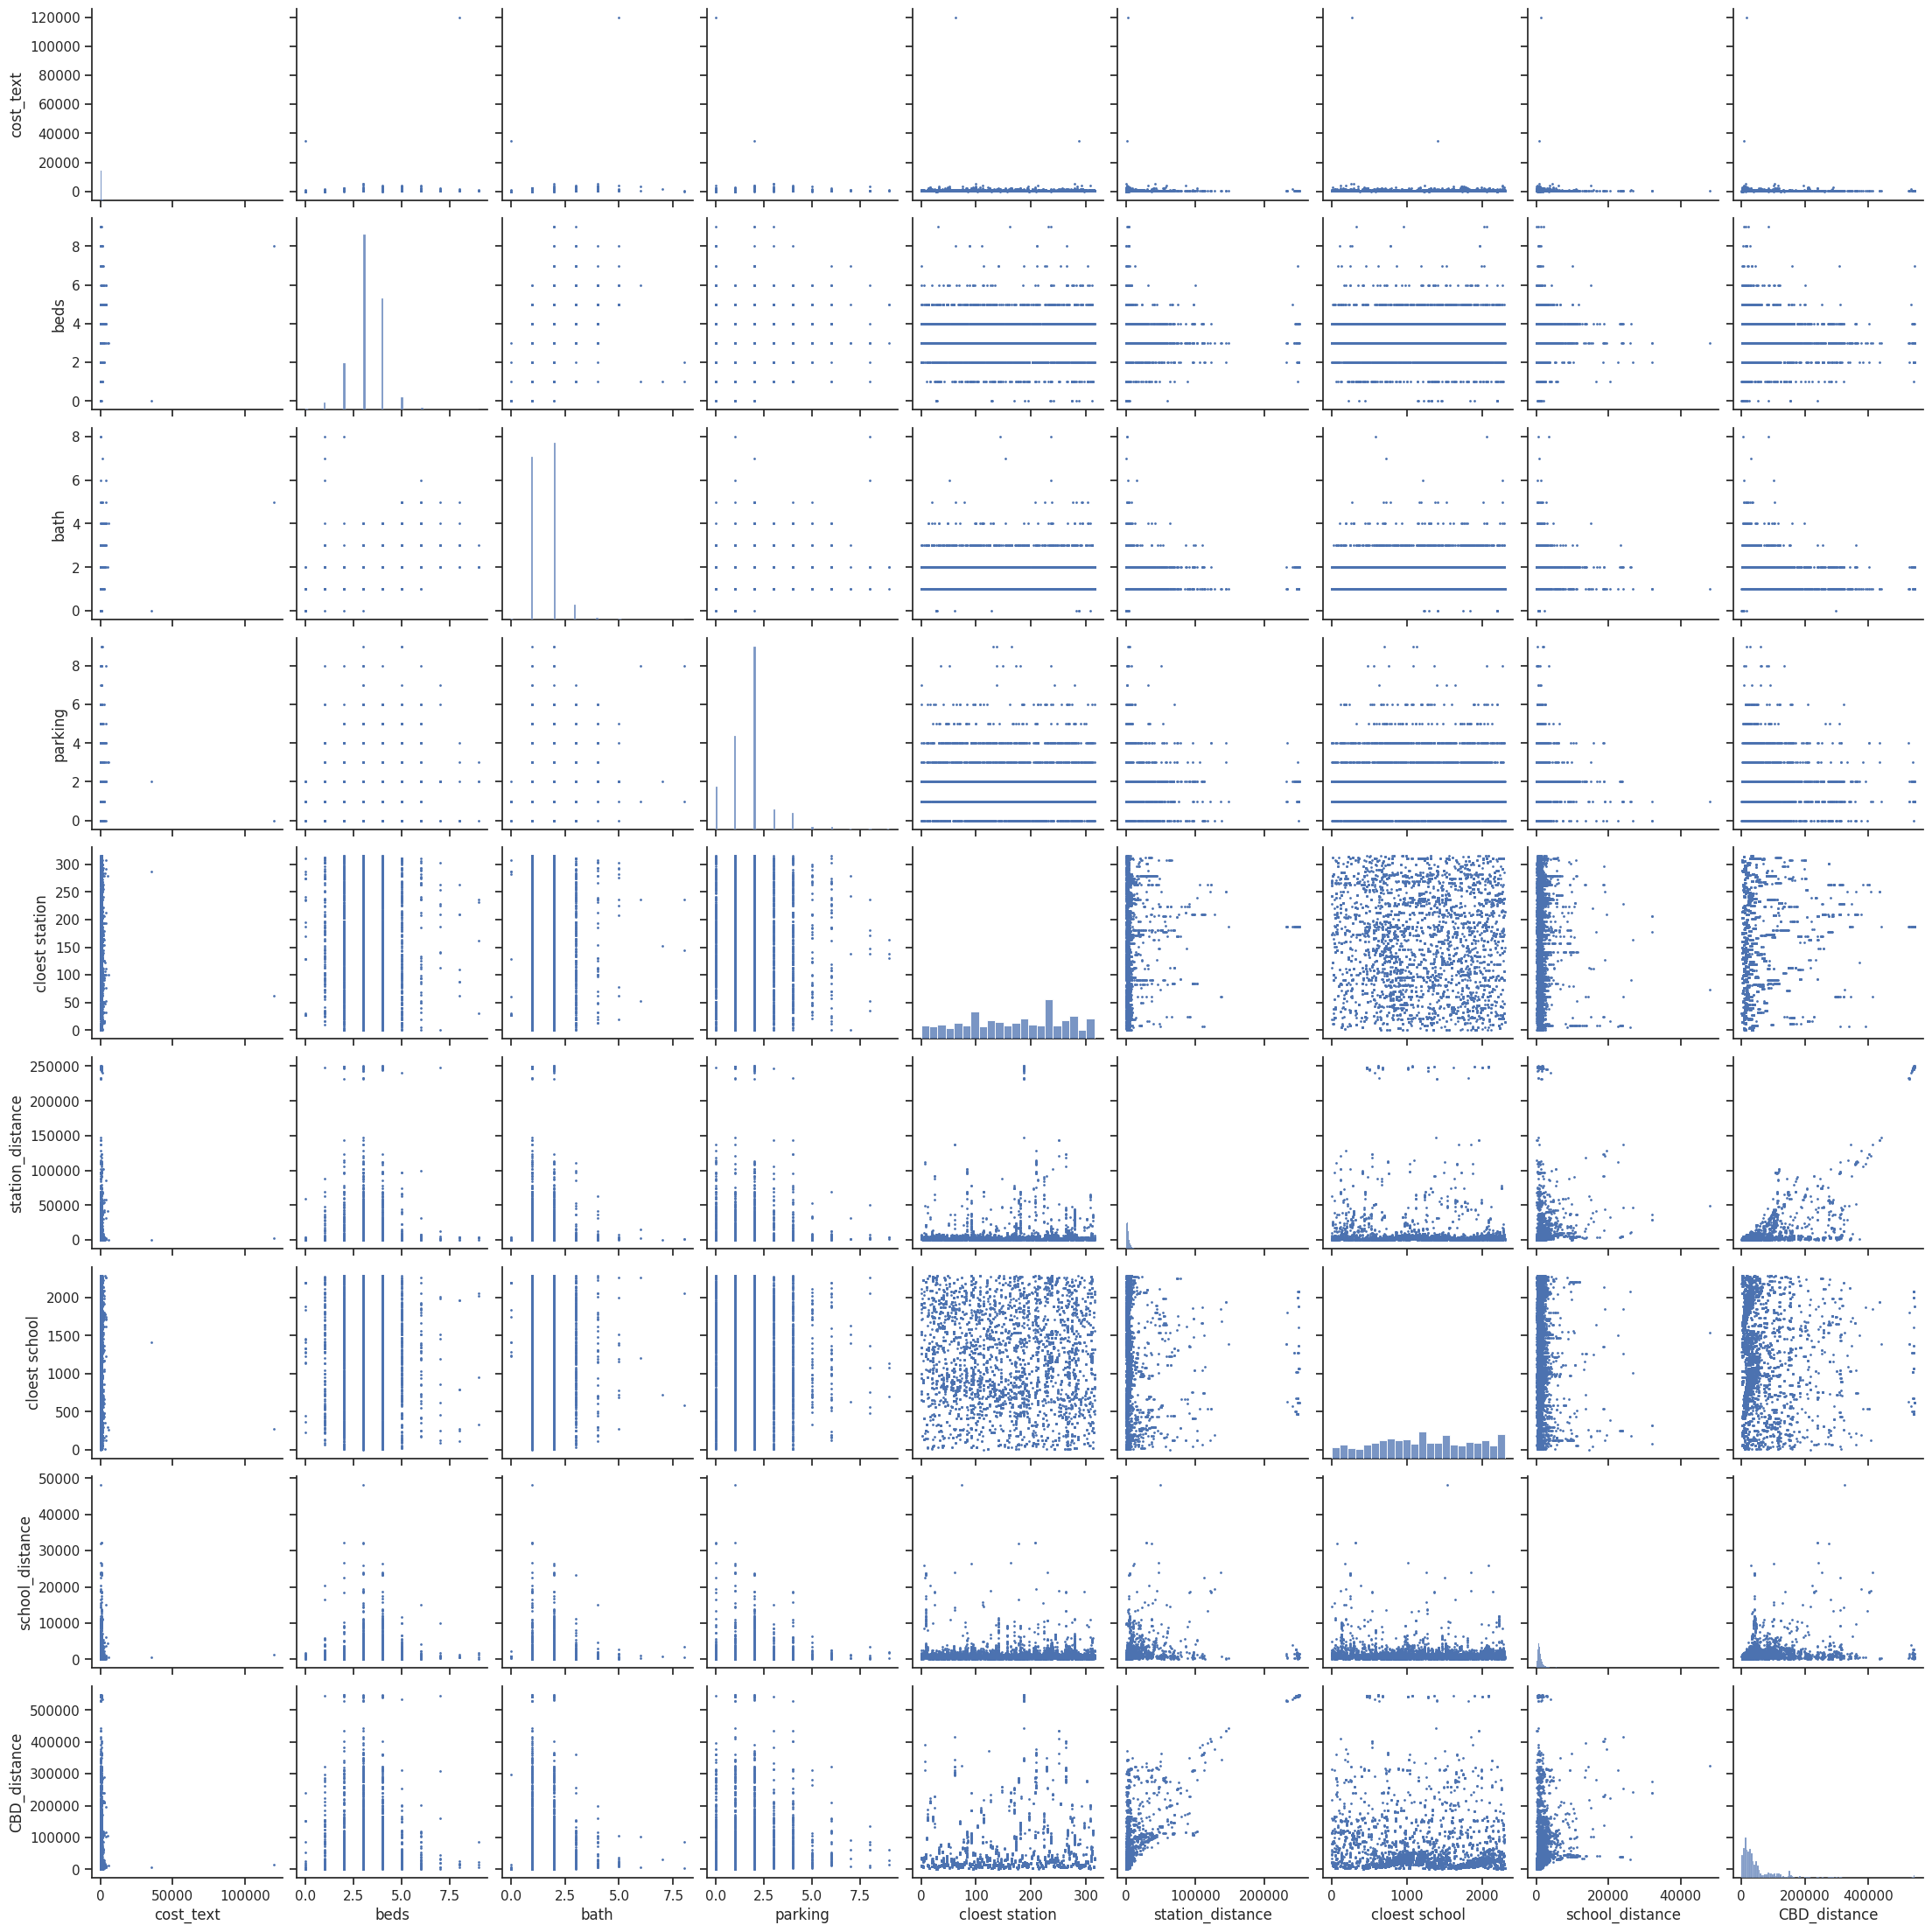

In [ ]:
g2 = sns.pairplot(house_type[COL_FITTER], plot_kws=dict(s=1, edgecolor="b", linewidth=1)) # Scatter plot of properties when type is House

In [ ]:
COL = ['cost_text', 'station_distance', 'school_distance']
Q1 = df[COL].quantile(0.25)
Q3 = df[COL].quantile(0.75)
IQR = Q3 - Q1
clean_df = df[~((df[COL] < (Q1 - 1.5 * IQR)) | (df[COL] > (Q3 + 1.5 * IQR))).any(axis=1)]  # Do an IQR on the total data to remove the outliers

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cost_text', ylabel='Density'>

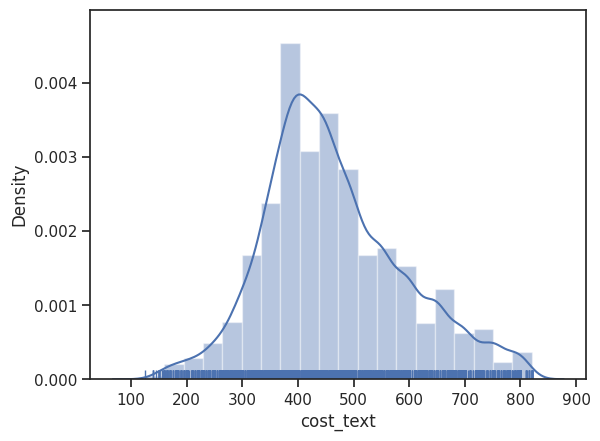

In [ ]:
sns.distplot(clean_df['cost_text'],kde = True, bins=20, rug = True) # distribution of cost_text

In [ ]:
 # Do an IQR on the data with cost mean of each suburb to remove the outliers
 
COL = ['cost_text']
Q1 = avg_cost[COL].quantile(0.25)
Q3 = avg_cost[COL].quantile(0.75)
IQR = Q3 - Q1 
clean_avg = avg_cost[~((avg_cost[COL] < (Q1 - 1.5 * IQR)) | (avg_cost[COL] > (Q3 + 1.5 * IQR))).any(axis=1)] 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cost_text', ylabel='Density'>

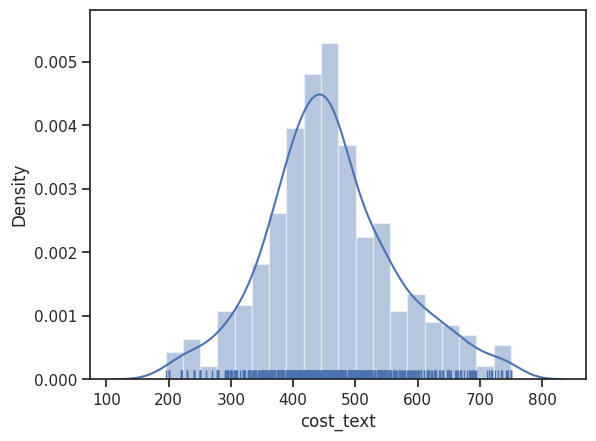

In [ ]:
sns.distplot(clean_avg['cost_text'],kde = True, bins=20, rug = True) # distribution for mean of cost_text in each suburb

Check and compare the distribution of the distance to the nearest school and the nearest station for each property.

(array([2327., 3267., 2278., 1324.,  918.,  710.,  446.,  338.,  199.,
         188.]),
 array([  10.06 ,  665.052, 1320.044, 1975.036, 2630.028, 3285.02 ,
        3940.012, 4595.004, 5249.996, 5904.988, 6559.98 ]),
 <BarContainer object of 10 artists>)

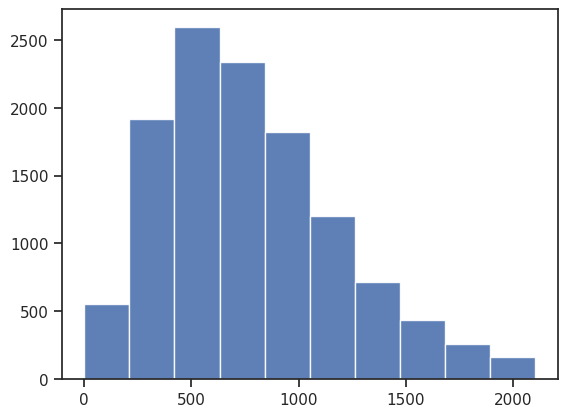

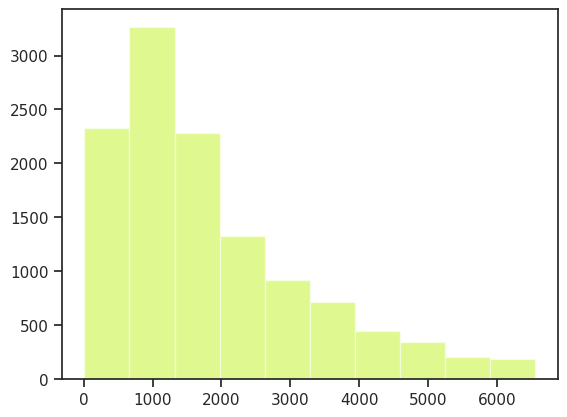

In [ ]:
plt.hist(clean_df.school_distance,  alpha=.9) 

plt.figure()

plt.hist(clean_df.station_distance,  color="#C1F320", alpha=.5)

(array([2327., 3267., 2278., 1324.,  918.,  710.,  446.,  338.,  199.,
         188.]),
 array([  10.06 ,  665.052, 1320.044, 1975.036, 2630.028, 3285.02 ,
        3940.012, 4595.004, 5249.996, 5904.988, 6559.98 ]),
 <BarContainer object of 10 artists>)

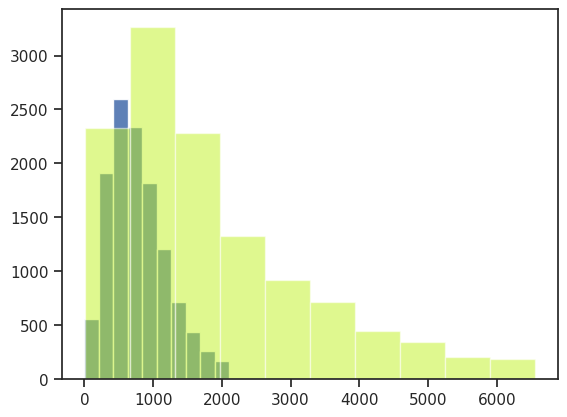

In [ ]:
plt.hist(clean_df.school_distance,  alpha=.9)

plt.hist(clean_df.station_distance, color="#C1F320", alpha=.5)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='school_distance', ylabel='station_distance'>

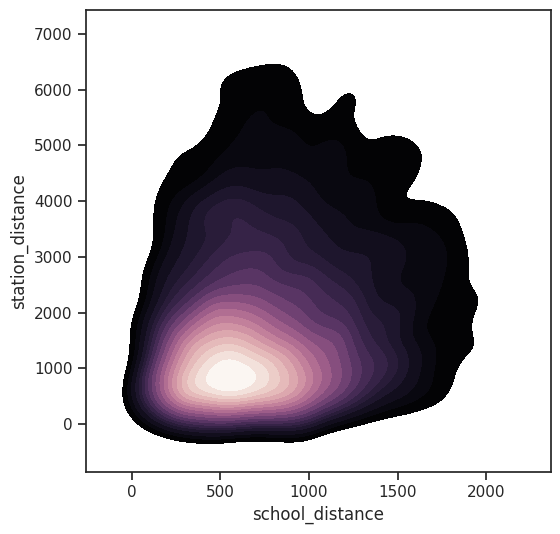

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(clean_df.school_distance, clean_df.station_distance, cmap=cmap, n_levels=20, shade=True) #kdeplot()